In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
pd.set_option('display.max_column',None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import keras
from keras.layers import Dense
from keras.models import Sequential

In [7]:
data=pd.read_csv('Car_sales.csv')

In [8]:
data.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [9]:
data.shape

(157, 16)

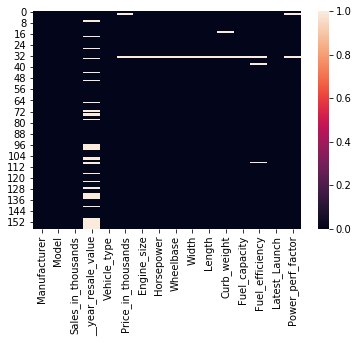

In [10]:
sns.heatmap(data.isnull())

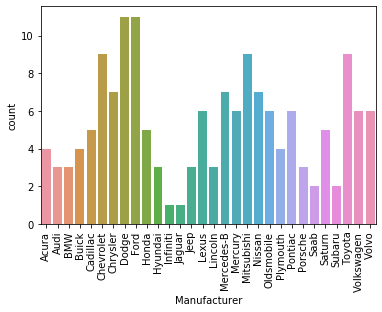

In [11]:
sns.countplot(data['Manufacturer'])
pl.xticks(range(30),np.unique(data['Manufacturer']),rotation=90)
pl.show()

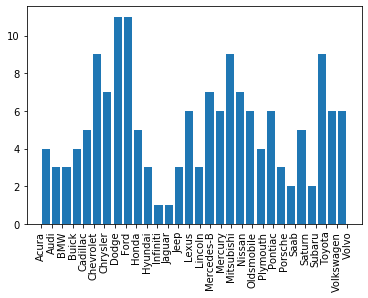

In [12]:
pl.hist(data['Manufacturer'],bins=30,rwidth=0.8)
pl.xticks(range(30),np.unique(data['Manufacturer']),rotation=90)
pl.show()

In [13]:
accura=data[data['Manufacturer']=='Acura']

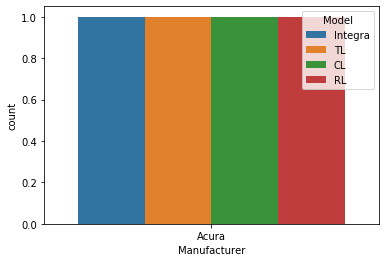

In [14]:
sns.countplot(accura['Manufacturer'],hue=accura['Model'])

In [15]:
data1=data.copy()

In [16]:
data1.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [17]:
data1.drop_duplicates()
data1.drop('Latest_Launch',axis=1,inplace=True)
data1.drop('__year_resale_value',axis=1,inplace=True)

In [18]:
data1.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Vehicle_type          0
Price_in_thousands    2
Engine_size           1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
Curb_weight           2
Fuel_capacity         1
Fuel_efficiency       3
Power_perf_factor     2
dtype: int64

In [19]:
categorical_variables=[columns for columns in data1.columns if data1[columns].dtypes=='O']
categorical_variables

['Manufacturer', 'Model', 'Vehicle_type']

In [20]:
continous_variables=[columns for columns in data1.columns if data1[columns].dtypes=='float64']
continous_variables

['Sales_in_thousands',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [21]:
# discrete_variables=[columns for columns in data1.columns if data[columns].dtypes!='O' and len(np.unique(data1[columns])<30)]
# discrete_variables

In [22]:
data2=data1.copy()

In [23]:
for columns in continous_variables:
    data2[columns].fillna(data2[columns].mean(),inplace=True)

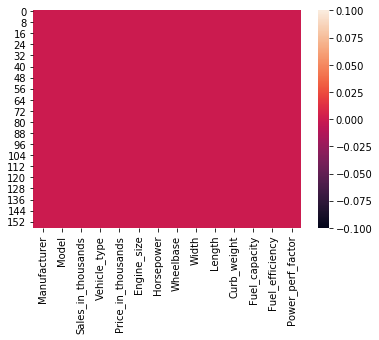

In [24]:
sns.heatmap(data2.isnull())

In [25]:
data2.head(10)

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,Acura,RL,8.588,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,A6,18.780,Passenger,33.950000,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
6,Audi,A8,1.380,Passenger,62.000000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,134.656858
7,BMW,323i,19.747,Passenger,26.990000,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,71.191207
8,BMW,328i,9.231,Passenger,33.400000,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,81.877069
9,BMW,528i,17.527,Passenger,38.900000,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,83.998724


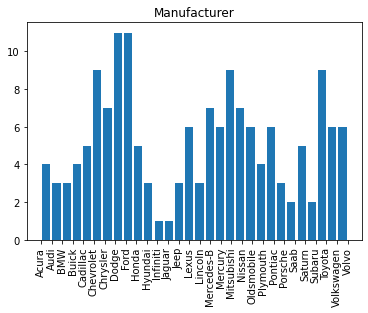

30


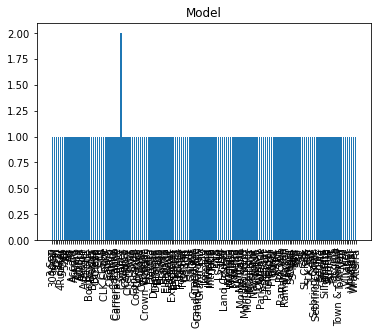

156


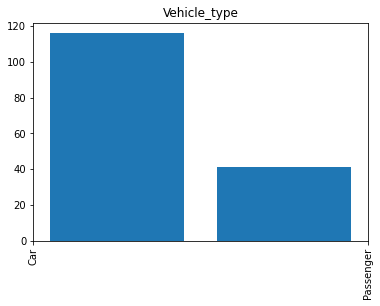

2


In [167]:
for columns in categorical_variables:
    length=(np.unique(data2[columns])).size
    pl.hist(data2[columns],bins=length,rwidth=0.8)
    pl.xticks(range(length),np.unique(data2[columns]),rotation=90)
    pl.title(columns)
    pl.show()
    print(length)

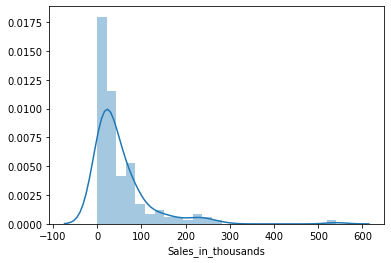

157


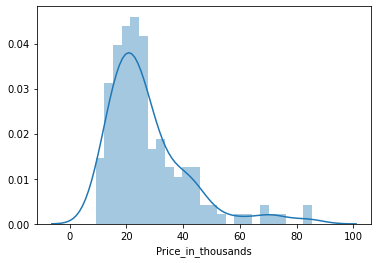

153


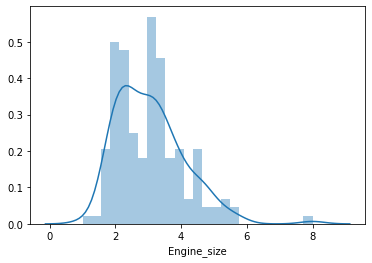

32


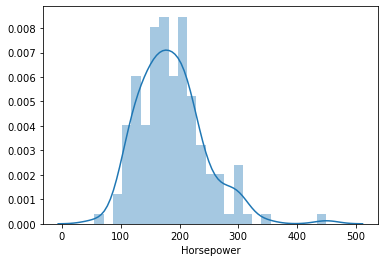

67


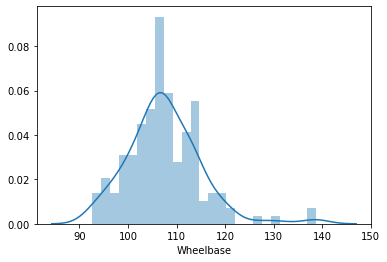

89


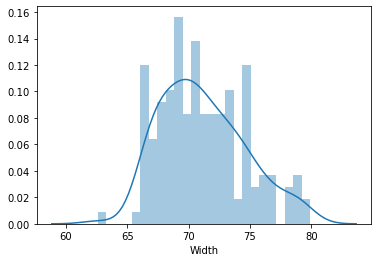

79


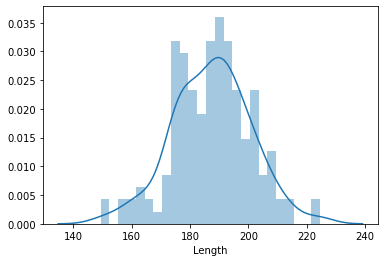

128


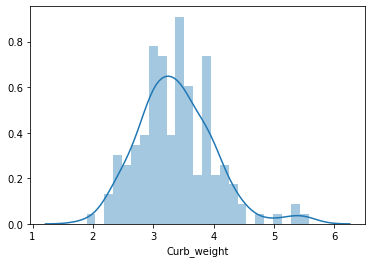

148


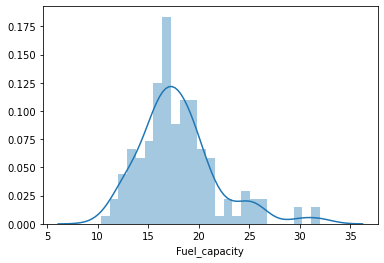

56


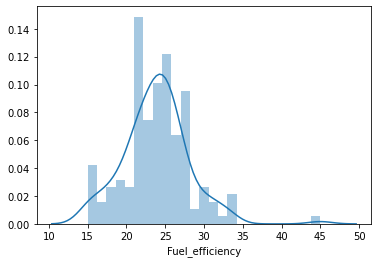

21


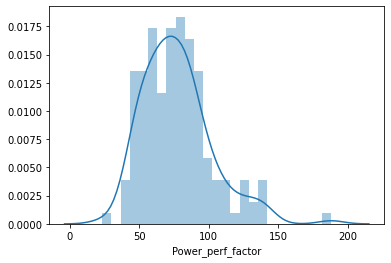

155


In [168]:
for columns in continous_variables:
    length=(np.unique(data2[columns])).size
#     pl.hist(data2[columns],bins=25,rwidth=0.8)
#     pl.xticks(range(length),np.unique(data2[columns]),rotation=90)
#     pl.title(columns)
    sns.distplot(data2[columns],bins=25)
    pl.show()
    print(length)

In [169]:
data2.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,Acura,RL,8.588,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [170]:
minmax=MinMaxScaler()
data2[continous_variables]=minmax.fit_transform(data2[continous_variables])


In [171]:
data2

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,0.031102,Passenger,0.160821,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314
1,Acura,TL,0.072669,Passenger,0.251295,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024
2,Acura,CL,0.025912,Passenger,0.238061,0.314286,0.430380,0.310195,0.462428,0.567244,0.428338,0.317972,0.366667,0.326123
3,Acura,RL,0.015687,Passenger,0.429620,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140
4,Audi,A4,0.037537,Passenger,0.193470,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,0.006356,Passenger,0.198846,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164
153,Volvo,S70,0.028004,Passenger,0.239494,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371
154,Volvo,V70,0.032234,Passenger,0.256540,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412
155,Volvo,C70,0.006260,Passenger,0.475513,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211


In [172]:
data3=data2.copy()
for columns in categorical_variables:
    column=columns
    dummies=pd.get_dummies(data2[columns])
    data3=pd.concat([data3,dummies],axis=1)
    data3.drop(columns,axis=1,inplace=True)

In [173]:
data3

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Acura,Audi,BMW,Buick,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,Hyundai,Infiniti,Jaguar,Jeep,Lexus,Lincoln,Mercedes-B,Mercury,Mitsubishi,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo,3-Sep,3000GT,300M,323i,328i,4Runner,5-Sep,528i,A4,A6,A8,Accent,Accord,Alero,Altima,Aurora,Avalon,Avenger,Beetle,Bonneville,Boxter,Bravada,Breeze,C-Class,C70,CL,CL500,CLK Coupe,CR-V,Cabrio,Camaro,Camry,Caravan,Carrera Cabrio,Carrera Coupe,Catera,Cavalier,Celica,Century,Cherokee,Cirrus,Civic,Concorde,Continental,Contour,Corolla,Corvette,Cougar,Crown Victoria,Cutlass,Dakota,DeVille,Diamante,Durango,E-Class,ES300,Eclipse,Elantra,Eldorado,Escalade,Escort,Expedition,Explorer,F-Series,Firebird,Focus,Forester,Frontier,GS300,GS400,GTI,Galant,Golf,Grand Am,Grand Cherokee,Grand Marquis,Grand Prix,I30,Impala,Integra,Intrepid,Intrigue,Jetta,LHS,LS,LS400,LW,LX470,Land Cruiser,LeSabre,Lumina,M-Class,Malibu,Maxima,Metro,Mirage,Montana,Monte Carlo,Montero,Montero Sport,Mountaineer,Mustang,Mystique,Navigator,Neon,Odyssey,Outback,Park Avenue,Passat,Passport,Pathfinder,Prizm,Prowler,Quest,RAV4,RL,RX300,Ram Pickup,Ram Van,Ram Wagon,Ranger,Regal,S-Class,S-Type,S40,S70,S80,SC,SL,SL-Class,SLK,SLK230,SW,Sable,Sebring Conv.,Sebring Coupe,Sentra,Seville,Sienna,Silhouette,Sonata,Stratus,Sunfire,TL,Tacoma,Taurus,Town & Country,Town car,V40,V70,Villager,Viper,Voyager,Windstar,Wrangler,Xterra,Car,Passenger
0,0.031102,0.160821,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.072669,0.251295,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.025912,0.238061,0.314286,0.430380,0.310195,0.462428,0.567244,0.428338,0.317972,0.366667,0.326123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.015687,0.429620,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.037537,0.193470,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,..

In [174]:
X=data3.drop('Price_in_thousands',axis=1)
y=data3['Price_in_thousands']

In [175]:
data2

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,0.031102,Passenger,0.160821,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314
1,Acura,TL,0.072669,Passenger,0.251295,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024
2,Acura,CL,0.025912,Passenger,0.238061,0.314286,0.430380,0.310195,0.462428,0.567244,0.428338,0.317972,0.366667,0.326123
3,Acura,RL,0.015687,Passenger,0.429620,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140
4,Audi,A4,0.037537,Passenger,0.193470,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,0.006356,Passenger,0.198846,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164
153,Volvo,S70,0.028004,Passenger,0.239494,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371
154,Volvo,V70,0.032234,Passenger,0.256540,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412
155,Volvo,C70,0.006260,Passenger,0.475513,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211


In [176]:
X=data2[continous_variables]
X=X.drop('Price_in_thousands',axis=1)
y=data2['Price_in_thousands']

In [177]:
X

,Sales_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,0.031102,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.212314
1,0.072669,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.413024
2,0.025912,0.314286,0.430380,0.310195,0.462428,0.567244,0.428338,0.317972,0.366667,0.326123
3,0.015687,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.413140
4,0.037537,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.239594
...,...,...,...,...,...,...,...,...,...,...
152,0.006356,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.262164
153,0.028004,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.287371
154,0.032234,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.290412
155,0.006260,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.475211


In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [179]:
model=Sequential()

In [180]:
model.add(Dense(input_dim=len(X_train.columns),units=64,activation='relu'))

In [181]:
model.add(Dense(units=28,activation='relu'))

In [182]:
model.add(Dense(units=1,activation='relu'))

In [183]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_38 (Dense)             (None, 28)                1820      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 29        
Total params: 2,553
Trainable params: 2,553
Non-trainable params: 0
_________________________________________________________________


In [184]:
model.compile(optimizer='adam',loss='mse',
             metrics=['accuracy'])

In [185]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
         epochs=100)

Train on 117 samples, validate on 40 samples
Epoch 1/100
117/117 [==============================] - 0s 708us/step - loss: 0.0927 - accuracy: 0.0085 - val_loss: 0.0767 - val_accuracy: 0.0000e+00
Epoch 2/100
117/117 [==============================] - 0s 51us/step - loss: 0.0846 - accuracy: 0.0085 - val_loss: 0.0615 - val_accuracy: 0.0000e+00
Epoch 3/100
117/117 [==============================] - 0s 51us/step - loss: 0.0638 - accuracy: 0.0085 - val_loss: 0.0360 - val_accuracy: 0.0000e+00
Epoch 4/100
117/117 [==============================] - 0s 51us/step - loss: 0.0375 - accuracy: 0.0085 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 5/100
117/117 [==============================] - 0s 60us/step - loss: 0.0206 - accuracy: 0.0085 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 6/100
117/117 [==============================] - 0s 60us/step - loss: 0.0174 - accuracy: 0.0085 - val_loss: 0.0167 - val_accuracy: 0.0000e+00
Epoch 7/100
117/117 [==============================] - 0s 51us/ste

Epoch 56/100
117/117 [==============================] - 0s 51us/step - loss: 0.0039 - accuracy: 0.0171 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 57/100
117/117 [==============================] - 0s 60us/step - loss: 0.0037 - accuracy: 0.0171 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 58/100
117/117 [==============================] - 0s 42us/step - loss: 0.0040 - accuracy: 0.0171 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 59/100
117/117 [==============================] - 0s 42us/step - loss: 0.0039 - accuracy: 0.0171 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 60/100
117/117 [==============================] - 0s 60us/step - loss: 0.0039 - accuracy: 0.0171 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 61/100
117/117 [==============================] - 0s 51us/step - loss: 0.0037 - accuracy: 0.0171 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 62/100
117/117 [==============================] - 0s 51us/step - loss: 0.0037 - accuracy: 0.0171 - v

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
tree=DecisionTreeRegressor()
rand=RandomForestRegressor()

In [187]:
rand.fit(X_train,y_train),tree.fit(X_train,y_train)

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))

In [188]:
rand.score(X_train,y_train),tree.score(X_train,y_train)

(0.9761017002971717, 0.9999999735184425)

In [192]:
rand.score(X_test,y_test),tree.score(X_test,y_test)

(0.8984708715264684, 0.6032242486679894)

In [193]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


In [213]:
def best_model(X,y):
    algos={'linear_regression':{
            'model':LinearRegression(),
            'params':{
            'normalize':[False,True],
            'fit_intercept':[True,False],
            }
            },
           'random_forest':{
                'model':RandomForestRegressor(),'params':{
                'ccp_alpha':[0,1]
            }},
           'decision_tree':{
                'model':DecisionTreeRegressor(),'params':{
                   'criterion':['mse','friedman_mse'],
                   'splitter':['best','random']
               }},
            'Ridge':{
                'model':Ridge(),'params':{
                'alpha':[1,2],
                
            }},
           'Lasso':{
               'model':Lasso(),'params':{
                'alpha':[0.1,1,2],
                'selection':['random','cyclic']
            }},
          }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
    for algoname,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv)
        gs.fit(X,y)
        scores.append({'model':algoname,'best_score':gs.best_score_,
                      'best_params':gs.best_params_})
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.949281,"{'fit_intercept': False, 'normalize': False}"
1,random_forest,0.849726,{'ccp_alpha': 0}
2,decision_tree,0.739687,"{'criterion': 'mse', 'splitter': 'best'}"
3,Ridge,0.769016,{'alpha': 1}
4,Lasso,-0.021212,"{'alpha': 0.1, 'selection': 'random'}"
